In [1]:
# Using Conv Nets to classify iamges
# There are 5 categories: arctic fox, earless seal, penguin, polar bear, snow leopard
# Each class has around 400 images in total
# The data are split into training set (80%), validation set (10%), and test set (10%)
# The model builds up convolutional network from scratch, and uses data augmentation.

In [2]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
from keras import optimizers
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
import os,shutil
base_dir = 'E:/pictures splited'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1583 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


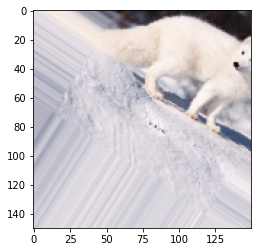

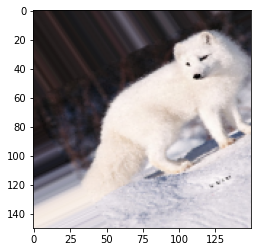

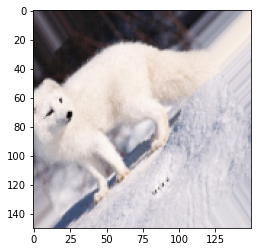

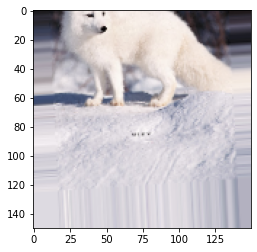

In [7]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_fox_dir = os.path.join(train_dir,'train_artic_fox')

fnames = [os.path.join(train_fox_dir, fname) for fname in os.listdir(train_fox_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [8]:
history = model.fit_generator(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=1)
# why do i still need 'steps_per_epoch'? Will it auto-caculate the number?

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/50 [========>.....................] - ETA: 30s - loss: 1.8924 - accuracy: 0.2313

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 47s 936ms/step - loss: 1.7146 - accuracy: 0.2925 - val_loss: 1.3621 - val_accuracy: 0.4375
Epoch 2/15
50/50 [==============================] - 47s 932ms/step - loss: 1.3805 - accuracy: 0.4435 - val_loss: 1.5971 - val_accuracy: 0.3750
Epoch 3/15
50/50 [==============================] - 46s 926ms/step - loss: 1.1782 - accuracy: 0.5237 - val_loss: 1.0849 - val_accuracy: 0.5000
Epoch 4/15
50/50 [==============================] - 46s 927ms/step - loss: 1.1022 - accuracy: 0.5730 - val_loss: 1.0389 - val_accuracy: 0.5938
Epoch 5/15
50/50 [==============================] - 47s 930ms/step - loss: 0.9346 - accuracy: 0.6368 - val_loss: 0.8776 - val_accuracy: 0.5938
Epoch 6/15
50/50 [==============================] - 47s 936ms/step - loss: 0.8411 - accuracy: 0.6766 - val_loss: 1.1732 - val_accuracy: 0.5312
Epoch 7/15
50/50 [==============================] - 46s 926ms/step - loss: 0.7594 - accuracy: 0.7018 - val_loss: 1.2743 - val_accuracy: 0.5625
Epoch 8/15

In [9]:
history.history

{'loss': [1.7146148681640625,
  1.3804608583450317,
  1.1781847476959229,
  1.1022430658340454,
  0.934587836265564,
  0.8410593867301941,
  0.7594388723373413,
  0.6272575259208679,
  0.5990229845046997,
  0.48221173882484436,
  0.4280693233013153,
  0.3723374009132385,
  0.3140873610973358,
  0.27169331908226013,
  0.2287326604127884],
 'accuracy': [0.2924826145172119,
  0.4434617757797241,
  0.5236892104148865,
  0.5729627013206482,
  0.6367656588554382,
  0.6765635013580322,
  0.7018319368362427,
  0.7675300240516663,
  0.7839545011520386,
  0.8275426626205444,
  0.8408085703849792,
  0.8622868061065674,
  0.8843967318534851,
  0.8963992595672607,
  0.9159823060035706],
 'val_loss': [1.3620610237121582,
  1.5971245765686035,
  1.0848623514175415,
  1.0388622283935547,
  0.8776107430458069,
  1.1732168197631836,
  1.2742857933044434,
  0.9112066030502319,
  1.063388466835022,
  0.9730479717254639,
  1.3177175521850586,
  0.638848066329956,
  1.0311139822006226,
  1.7251828908920288,

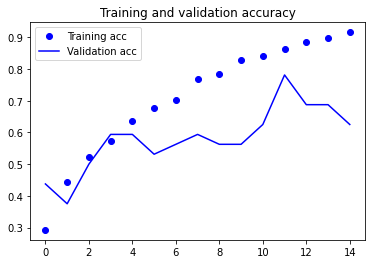

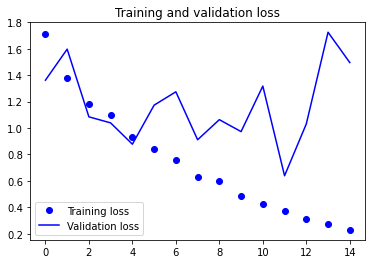

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# epoch = 10, overfits